# **COMPARING 3 CLUSTERING METHOD FOR CUSTOMER SEGMENTATION BASED ON RFM ANALYSIS**

By: Indah Yunita


---
Metode Clustering:
1. K-Means
2. K-Medoid
3. K-SOM



## **1. Pre-Requirement**

In [1]:
#library untuk dataframe dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib import ticker

#library untuk clustering
!pip install scikit-learn-extra
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.1 MB/s eta 0:00:00


# **Dataset**

**Sumber Data:** https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci


---
**Parameter:**

**Invoice:** Merupakan nomor transaksi berukuran 6 digit. Masing-masing nomor bersifat unik untuk setiap transaksi. Jika kode transaksi ini diawali dengan huruf ’C’ maka menandakan bahwa transaksi tersebut dibatalkan (Cancelled)

**StockCode:** Merupakan kode produk sebanyak 5 digit yang masing-masing kode mewakili setiap produk yang dijual

**Description:** Merupakan nama produk yang dijual

**InvoiceDate:** Merupakan tanggal dan waktu transaksi

**Price:** Merupakan harga produk per unit dalam satuan mata uang sterling

**Customer ID:** Merupakan kode pelanggan berukuran 5 digit yang unik untuk masing-masing pelanggan

Country: Merupakan nama kota tempat pelanggan


In [2]:
url = "https://raw.githubusercontent.com/inyunita/Dataset-KP/main/online_retail_II.csv"
df_retail = pd.read_csv(url, on_bad_lines='skip')
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
df_retail.shape

(1067371, 8)

## **2. Cleaning Data**

 **Handling Missing Value**

In [5]:
#jumlah data yang kosong
df_retail.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [6]:
#hapus data kosong
df_retail = df_retail.dropna()
df_retail.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [7]:
df_retail.shape

(824364, 8)

**Merubah Customer ID ke dalam bentuk string**

In [8]:
#merubah tipe data customer ID ke string
df_retail['Customer ID'] = df_retail['Customer ID'].astype(str)

In [9]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   Price        824364 non-null  float64
 6   Customer ID  824364 non-null  object 
 7   Country      824364 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 56.6+ MB


**Menghapus nilai-nilai yang tidak relevan**

---

1. Menghapus transaksi yang dibatalkan (ditandai dengan huruf C pada kode invoice)
2. Menghapus quantity dan prizce yang bernilai 0 dan dibawah 0


In [10]:
#cek apakah ada quantity yang bernilai 0
df_retail[df_retail["Quantity"]<=0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [11]:
#cek apakah ada price yang bernilai 0
df_retail[df_retail["Price"]<=0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
...,...,...,...,...,...,...,...,...
1004540,577129,22464,HANGING METAL HEART LANTERN,4,2011-11-17 19:52:00,0.0,15602.0,United Kingdom
1005014,577168,M,Manual,1,2011-11-18 10:42:00,0.0,12603.0,Germany
1006110,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-11-18 13:23:00,0.0,12444.0,Norway
1011446,577696,M,Manual,1,2011-11-21 11:57:00,0.0,16406.0,United Kingdom


In [12]:
#menghilangkan transaksi yang dibatalkan
df_retail = df_retail[~df_retail["Invoice"].str.contains("C", na = False)]
#menghapus quantity dan price yang bernilai 0 dan dibawah 0
df_retail = df_retail[(df_retail["Quantity"]>0)]
df_retail = df_retail[(df_retail["Price"]>0)]

Menghapus Data Duplikat

In [13]:
#Cek data duplikat
df_retail[df_retail.duplicated()].shape

(26124, 8)

In [14]:
df_retail[df_retail.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067136,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
1067150,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
1067153,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
1067160,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [15]:
#hapus data duplikat
df_retail = df_retail.drop_duplicates(keep='first')
df_retail.shape

(779425, 8)

# **3. Exploratory Data Analysis**

In [16]:
#Total transaksi pada dataset
df_retail['Invoice'].nunique()

36969

In [17]:
#Jumlah customer 
df_retail['Customer ID'].nunique()

5878

In [18]:
#Jumlah total barang yang terjual 
df_retail['Quantity'].sum()

10513952

In [19]:
#menambahkan revenue
df_retail['Revenue'] = df_retail['Quantity'] * df_retail['Price']
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


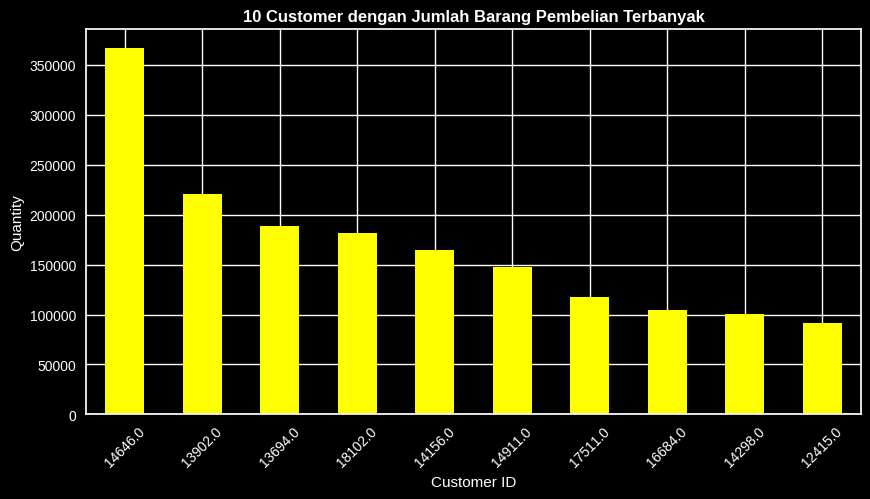

In [20]:
# 10 Customer Dengan jumlah barang dibeli paling banyak
plt.style.use('dark_background')
df_retail.groupby('Customer ID')['Quantity'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='yellow', figsize=(10,5))
plt.xlabel('Customer ID')
plt.ylabel('Quantity')
plt.title('10 Customer dengan Jumlah Barang Pembelian Terbanyak', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

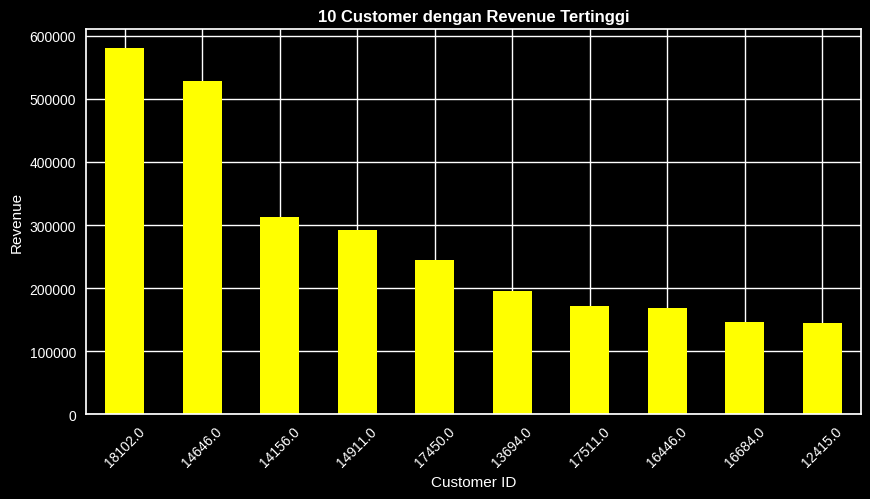

In [21]:
# 10 Customer dengan Revenue tertinggi
df_retail.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='yellow', figsize=(10,5))
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.title('10 Customer dengan Revenue Tertinggi', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

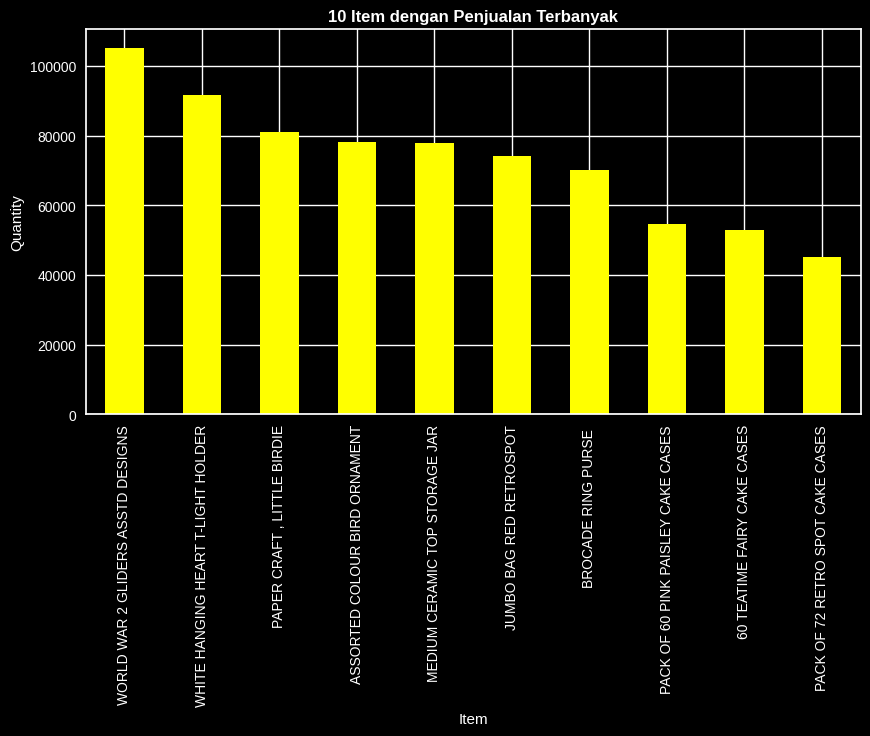

In [22]:
# 10 Item dengan Penjualan Terbanyak
df_retail.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='yellow', figsize=(10,5))
plt.xlabel('Item')
plt.ylabel('Quantity')
plt.title('10 Item dengan Penjualan Terbanyak', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

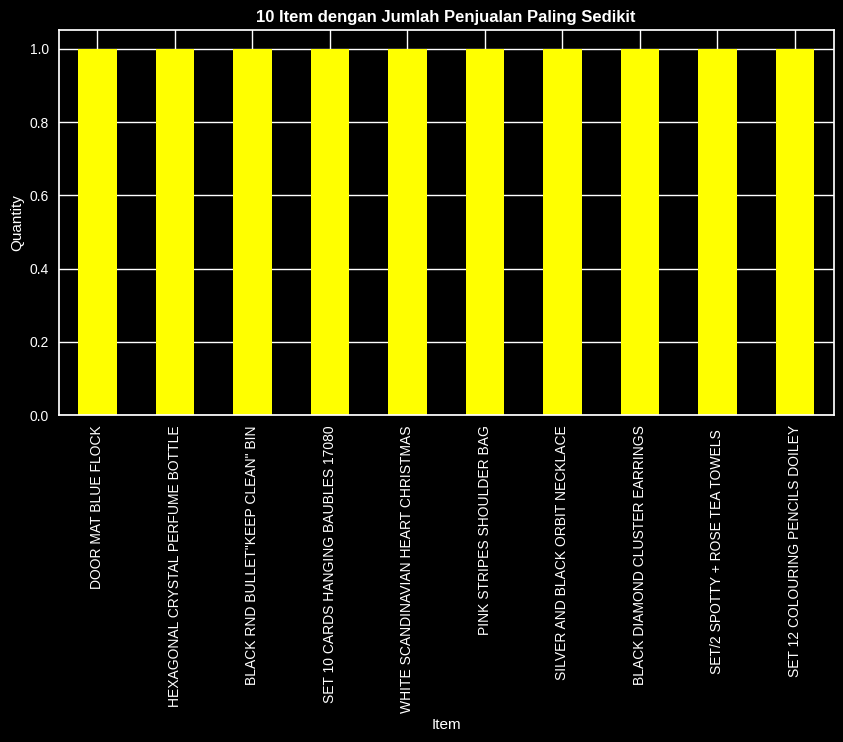

In [23]:
# 10 Item dengan Penjualan Paling Sedikit
df_retail.groupby('Description')['Quantity'].sum().sort_values(ascending=False).tail(10).plot(kind='bar', color='yellow', figsize=(10,5))
plt.xlabel('Item')
plt.ylabel('Quantity')
plt.title('10 Item dengan Jumlah Penjualan Paling Sedikit', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

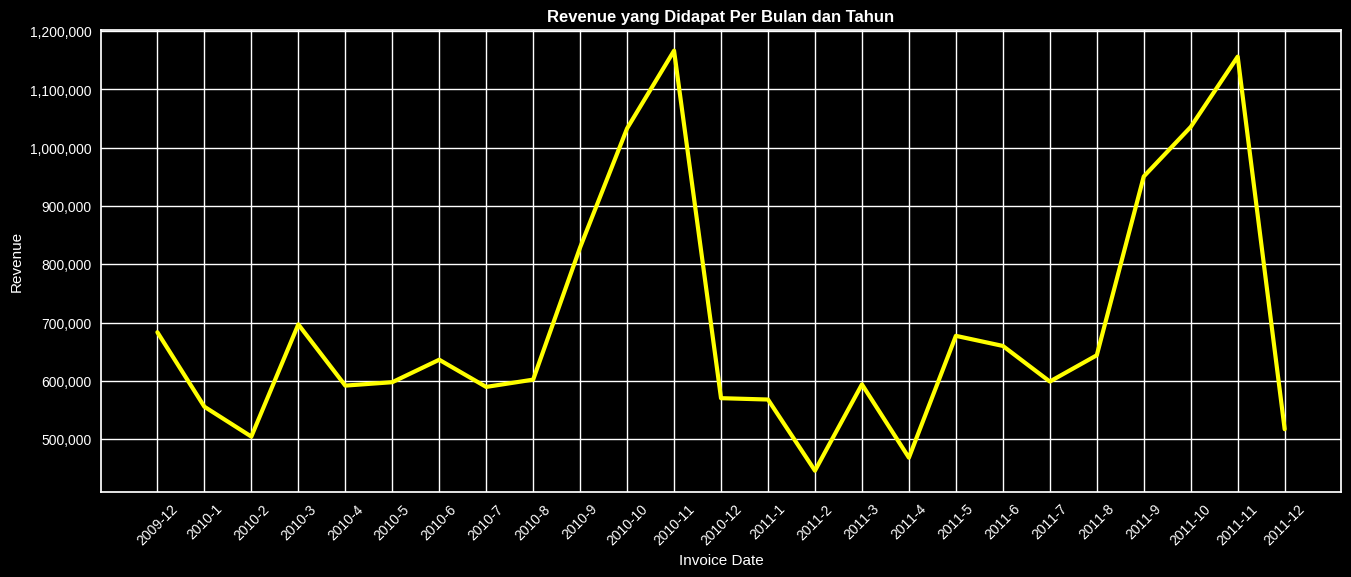

In [24]:
# Revenue per bulan dan tahun
df_retail['InvoiceDate']= pd.to_datetime(df_retail['InvoiceDate'])
monthly_revenue = df_retail.groupby([df_retail['InvoiceDate'].dt.year, df_retail['InvoiceDate'].dt.month])['Revenue'].sum()

# Create a line plot of monthly revenue
ax = monthly_revenue.plot(kind='line', figsize=(16,6), color='yellow', linewidth=3)

# Set xticks and xticklabels to show all values
ax.set_xticks(range(len(monthly_revenue.index)))
ax.set_xticklabels(['{}-{}'.format(year, month) for year, month in monthly_revenue.index], rotation=45)

# Set ylabel format
fmt = '{x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
# set title and label
plt.xlabel('Invoice Date')
plt.ylabel('Revenue')
plt.title('Revenue yang Didapat Per Bulan dan Tahun', fontweight='bold')

# Show the plot
plt.show()

# **4. RFM Value**


---
Analisis customer didasarkan pada 3 faktor:

**R (Recency)**: Jumlah hari sejak terakhir transaksi (Seberapa baru pelanggan melakukan transaksi)

**F (Frequency)**: Jumlah Transaksi

**M (Monetary)**: Total jumlah nominal transaks



In [25]:
#Atribut Baru : Monetary
df_retail['Monetary/Amount'] = df_retail['Quantity']*df_retail['Price']
rfm_monetary = df_retail.groupby('Customer ID')['Monetary/Amount'].sum()

In [26]:
rfm_monetary = rfm_monetary.reset_index()
rfm_monetary.head()

,Customer ID,Monetary/Amount
0,12346.0,77556.46
1,12347.0,4921.53
2,12348.0,2019.40
3,12349.0,4428.69
4,12350.0,334.40


In [27]:
#Atribut baru: Frequency
rfm_frequency = df_retail.groupby('Customer ID')['Invoice'].nunique()
rfm_frequency = rfm_frequency.reset_index()
rfm_frequency.columns = ['Customer ID', 'Frequency']
rfm_frequency.head()

,Customer ID,Frequency
0,12346.0,12
1,12347.0,8
2,12348.0,5
3,12349.0,4
4,12350.0,1


In [28]:
#transaksi terakhir di retail
max_date = max(df_retail["InvoiceDate"])
max_date

Timestamp('2011-12-09 12:50:00')

In [29]:
#Selisih max date dan transaction date
df_retail['Diff'] = max_date - df_retail['InvoiceDate']
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Monetary/Amount,Diff
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,83.4,738 days 05:05:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,81.0,738 days 05:05:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,81.0,738 days 05:05:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,100.8,738 days 05:05:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,30.0,738 days 05:05:00


Recency: selisih dari masing-masing transaksi di groupby dengan customer ID,kemudian dicari nilai minimal/yang paling dekat dengan transaksi terakhir

In [30]:
#mencari recency 
rfm_recency = df_retail.groupby('Customer ID')['Diff'].min()
rfm_recency = rfm_recency.reset_index()
rfm_recency.head()

,Customer ID,Diff
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [31]:
#tampilkan jumlah harinya saja
rfm_recency['Diff'] = rfm_recency['Diff'].dt.days
rfm_recency.head()

,Customer ID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [32]:
#merge column
rfm = pd.merge(rfm_recency, rfm_frequency, on= "Customer ID", how='inner')
rfm.head()

,Customer ID,Diff,Frequency
0,12346.0,325,12
1,12347.0,1,8
2,12348.0,74,5
3,12349.0,18,4
4,12350.0,309,1


In [33]:
#merge column
rfm = pd.merge(rfm, rfm_monetary, on= "Customer ID", how='inner')
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,12,77556.46
1,12347.0,1,8,4921.53
2,12348.0,74,5,2019.40
3,12349.0,18,4,4428.69
4,12350.0,309,1,334.40


In [34]:
rfm

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,12,77556.46
1,12347.0,1,8,4921.53
2,12348.0,74,5,2019.40
3,12349.0,18,4,4428.69
4,12350.0,309,1,334.40
...,...,...,...,...
5873,18283.0,3,22,2664.90
5874,18284.0,431,1,461.68
5875,18285.0,660,1,427.00
5876,18286.0,476,2,1296.43


Text(0.5, 0, 'Attributes')

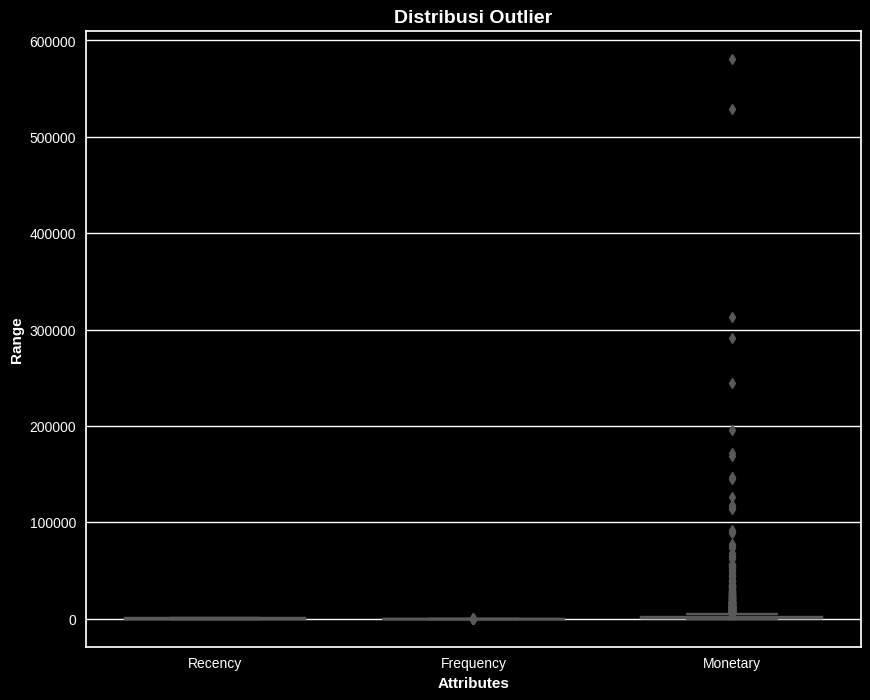

In [35]:
#Analisis outliers dari Amount, Frequency, dan Recency
atribut = ['Recency', 'Frequency', 'Monetary']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[atribut], orient="v", palette = "Set2", whis=1.5, saturation=1, width=0.7)

plt.title ("Distribusi Outlier", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
# plt.savefig("Outlier Sebelum dihilangkan")

In [36]:
 #menghilangkan outlier pada atribut Monetary
 Q1 = rfm.Monetary.quantile(0.05)
 Q3 = rfm.Monetary.quantile(0.95)
 IQR = Q3 - Q1
 rfm = rfm[(rfm.Monetary >= Q1 - 1.5*IQR) & (rfm.Monetary <= Q3 + 1.5*IQR )]

 #menghilangkan outlier pada atribut recency
 Q1 = rfm.Recency.quantile(0.05)
 Q3 = rfm.Recency.quantile(0.95)
 IQR = Q3 - Q1
 rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR )]

#menghilangkan outlier pada atribut Frequency
 Q1 = rfm.Frequency.quantile(0.05)
 Q3 = rfm.Frequency.quantile(0.95)
 IQR = Q3 - Q1
 rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR )]


In [37]:
rfm

,Customer ID,Recency,Frequency,Monetary
1,12347.0,1,8,4921.53
2,12348.0,74,5,2019.40
3,12349.0,18,4,4428.69
4,12350.0,309,1,334.40
5,12351.0,374,1,300.93
...,...,...,...,...
5873,18283.0,3,22,2664.90
5874,18284.0,431,1,461.68
5875,18285.0,660,1,427.00
5876,18286.0,476,2,1296.43


In [38]:
rfm = rfm.reset_index()
rfm=rfm.drop(['index'],axis=1)
rfm

,Customer ID,Recency,Frequency,Monetary
0,12347.0,1,8,4921.53
1,12348.0,74,5,2019.40
2,12349.0,18,4,4428.69
3,12350.0,309,1,334.40
4,12351.0,374,1,300.93
...,...,...,...,...
5768,18283.0,3,22,2664.90
5769,18284.0,431,1,461.68
5770,18285.0,660,1,427.00
5771,18286.0,476,2,1296.43


Text(0.5, 0, 'Attributes')

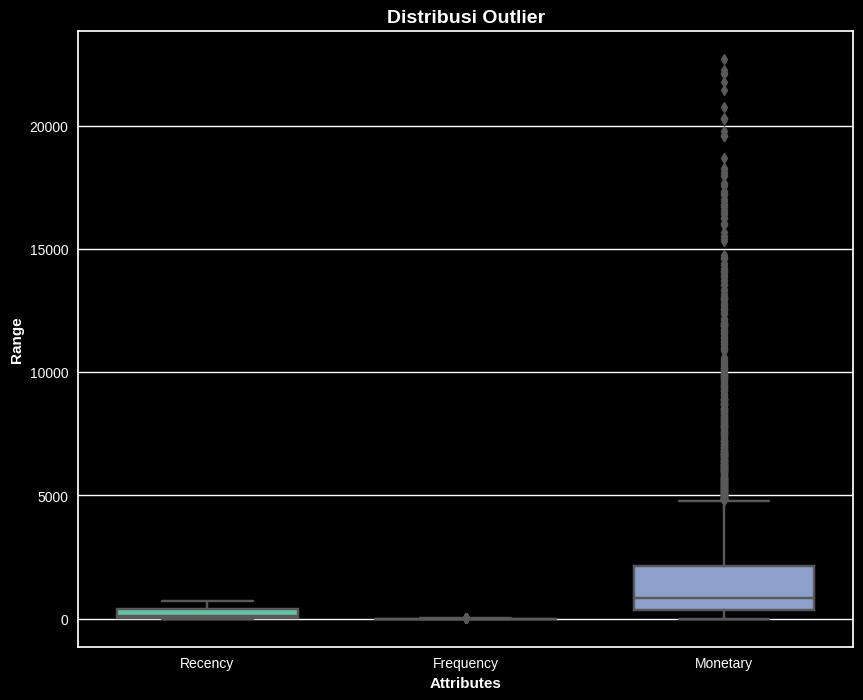

In [39]:
#Analisis outliers dari Amount, Frequency, dan Recency
atribut = ['Recency', 'Frequency', 'Monetary']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[atribut], orient="v", palette = "Set2", whis=1.5, saturation=1, width=0.7)

plt.title ("Distribusi Outlier", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
# plt.savefig("Outlier Setelah dihilangkan")

**Normalisasi Atribut**

---

Untuk menormalisasi nilai dari masing-masing atribut, perlu dilihat terlebih dahulu bagaimana karakteristik dari data apakah berdistribusi normal ataukah tidak

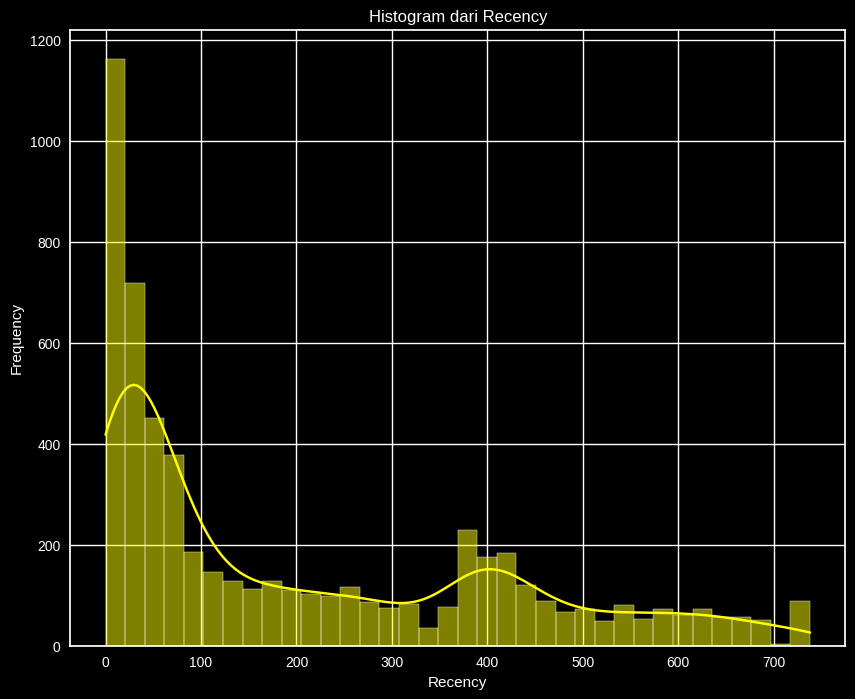

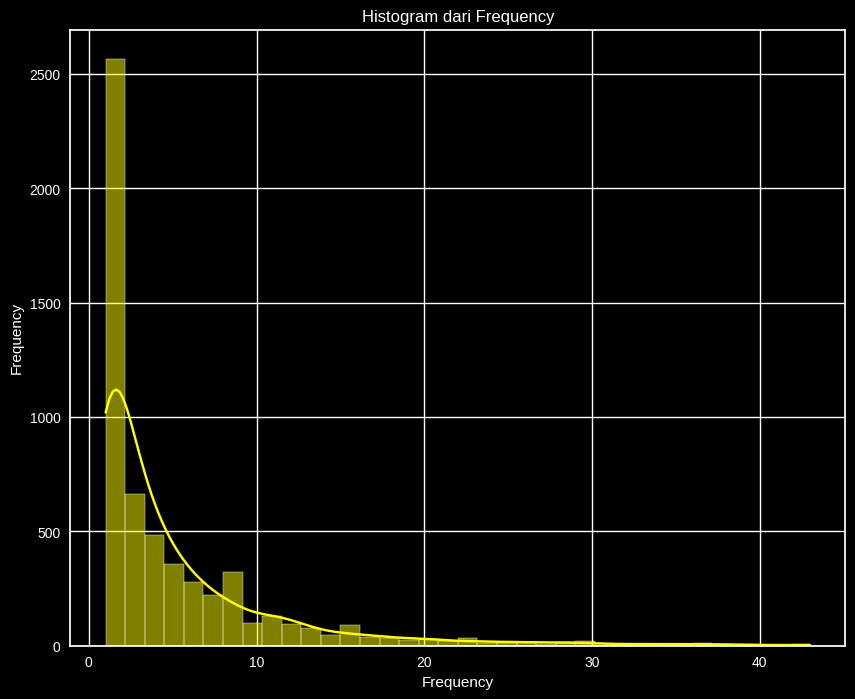

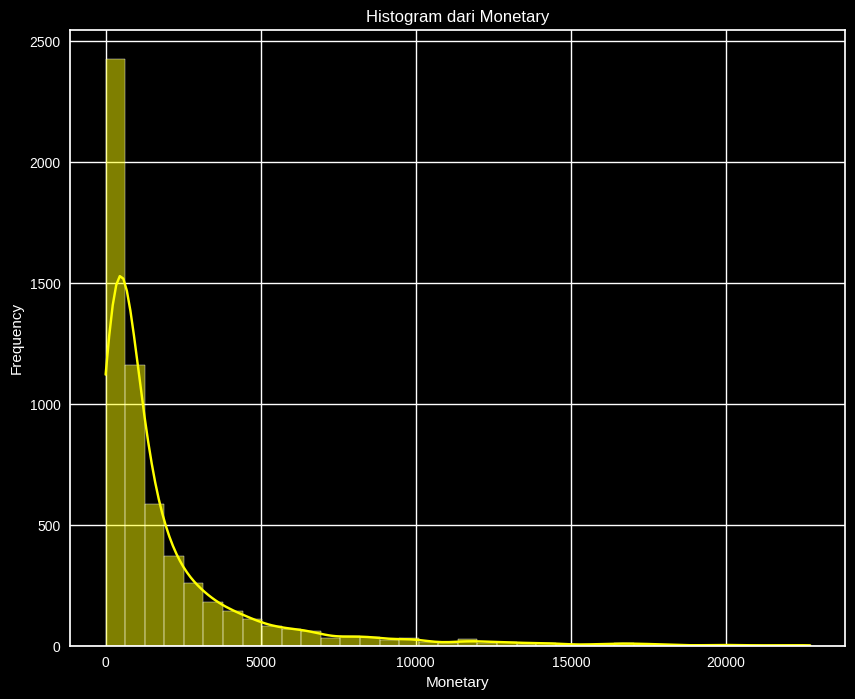

In [52]:
# Visualisasikan distribusi data untuk setiap atribut
attributes = ['Recency', 'Frequency', 'Monetary']
for attribute in attributes:
  sns.histplot(rfm[attribute], kde=True,
             bins = int(180/5), color='yellow')
  plt.xlabel(attribute)
  plt.ylabel('Frequency')
  plt.title('Histogram dari ' + attribute)
  plt.show()

Karena data tidak berdistribusi normal, maka metode normalisasi yang digunakan adalah Min-Max Scaller

In [53]:
#karena data tidak berdistribusi normal, maka untuk normalisasi data menggunakan minmax scaller
rfm_attribute = rfm[['Recency', 'Frequency', 'Monetary']]
scaler = MinMaxScaler()
#fit transform
rfm_scaled = scaler.fit_transform(rfm_attribute)


In [54]:
rfm_scaled

array([[0.00135501, 0.16666667, 0.21660835],
       [0.100271  , 0.0952381 , 0.08880203],
       [0.02439024, 0.07142857, 0.19490427],
       ...,
       [0.89430894, 0.        , 0.01867465],
       [0.64498645, 0.02380952, 0.0569633 ],
       [0.05691057, 0.14285714, 0.18408394]])

In [56]:
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['Recency','Frequency','Monetary']
rfm_scaled

,Recency,Frequency,Monetary
0,0.001355,0.166667,0.216608
1,0.100271,0.095238,0.088802
2,0.024390,0.071429,0.194904
3,0.418699,0.000000,0.014597
4,0.506775,0.000000,0.013123
...,...,...,...
5768,0.004065,0.500000,0.117229
5769,0.584011,0.000000,0.020202
5770,0.894309,0.000000,0.018675
5771,0.644986,0.023810,0.056963


## **5. Perbandingan Metode Clustering Menggunakan Silhouettee Score**

### **K-Means**

In [142]:
 from sklearn.metrics import davies_bouldin_score

### Silhouette Score

In [143]:
K_value = []
sil_score_kmeans=[]
DBI_score_kmeans=[]
for kluster in range (2,11):
  kmeans = KMeans(n_clusters=kluster, n_init = 10)
  K_value.append(kluster)
  kmeans.fit(rfm_scaled)
  from sklearn.metrics import silhouette_score
  score = silhouette_score(rfm_scaled, kmeans.labels_)
  sil_score_kmeans.append(score)

  score = davies_bouldin_score(rfm_scaled, kmeans.labels_)
  DBI_score_kmeans.append(score)

In [144]:
tbl_sil_kmeans = pd.DataFrame({'Nilai K': K_value, 'Silhouette Score' : sil_score_kmeans})
tbl_sil_kmeans
     

,Nilai K,Silhouette Score
0,2,0.568010
1,3,0.568729
2,4,0.525855
3,5,0.466743
4,6,0.477663
5,7,0.456580
6,8,0.454698
7,9,0.430025
8,10,0.415368


### DBI Score

In [145]:
tbl_DBI_kmeans = pd.DataFrame({'Nilai K': K_value, 'DBI Score' : DBI_score_kmeans})
tbl_DBI_kmeans

,Nilai K,DBI Score
0,2,0.624686
1,3,0.676220
2,4,0.671834
3,5,0.766211
4,6,0.725308
5,7,0.815503
6,8,0.796236
7,9,0.835227
8,10,0.844610


### **K-Medoids**

### Silhouette Score

In [139]:
K_value = []
sil_score_kmedoids=[]
DBI_score_kmedoids=[]
for kluster in range (2,11):
  kmedoid = KMedoids(n_clusters=kluster)
  K_value.append(kluster)
  kmedoid.fit(rfm_scaled)
  from sklearn.metrics import silhouette_score
  score = silhouette_score(rfm_scaled, kmedoid.labels_)
  sil_score_kmedoids.append(score)

  core = davies_bouldin_score(rfm_scaled, kmedoid.labels_)
  DBI_score_kmedoids.append(score)
     

In [140]:
tbl_sil_kmedoids = pd.DataFrame({'Nilai K': K_value, 'Silhouette Score' : sil_score_kmedoids})
tbl_sil_kmedoids

,Nilai K,Silhouette Score
0,2,0.566044
1,3,0.364728
2,4,0.441970
3,5,0.441930
4,6,0.461760
5,7,0.337907
6,8,0.372507
7,9,0.359850
8,10,0.354724


### DBI Score

In [141]:
tbl_DBI_kmedoids = pd.DataFrame({'Nilai K': K_value, 'DBI Score' : DBI_score_kmedoids})
tbl_DBI_kmedoids

,Nilai K,DBI Score
0,2,0.566044
1,3,0.364728
2,4,0.441970
3,5,0.441930
4,6,0.461760
5,7,0.337907
6,8,0.372507
7,9,0.359850
8,10,0.354724


### **K-SOM**

### Silhouette Score

In [136]:
from minisom import MiniSom
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

data = np.array(rfm_scaled)
# Define range of cluster numbers
cluster_numbers = range(2, 11)

# Initialize lists to store silhouette scores
sil_score_ksom = []
DBI_score_ksom = []

# Iterate over different cluster numbers
for n_cluster in cluster_numbers:
    # Determine the number of rows and columns for the grid
    n_rows = 1
    n_columns = n_cluster

    # Initialize and train K-SOM
    som = MiniSom(n_rows, n_columns, data.shape[1], sigma=0.1, learning_rate=0.5, random_seed=42)
    som.random_weights_init(data)
    som.train_random(data, 100)

    # Get cluster labels for data
   # Get the winning neuron for each data point
    winners = np.array([som.winner(x) for x in data])

    # Map the winning neuron to cluster labels
    labels = np.ravel_multi_index(winners.T, (n_rows, n_columns))

    # Calculate silhouette score
    
    silhouette_avg = silhouette_score(data, labels)
    sil_score_ksom.append(silhouette_avg)

    # Calculate DBI score
    score = davies_bouldin_score(data, labels)
    DBI_score_ksom.append(score)

In [137]:
tbl_sil_ksom = pd.DataFrame({'Nilai K': cluster_numbers, 'Silhouette Score' : sil_score_ksom})
tbl_sil_ksom

,Nilai K,Silhouette Score
0,2,0.559187
1,3,0.458755
2,4,0.523642
3,5,0.409535
4,6,0.454855
5,7,0.413737
6,8,0.387979
7,9,0.341976
8,10,0.386522


In [138]:
tbl_DBI_ksom = pd.DataFrame({'Nilai K': cluster_numbers, 'DBI Score' : DBI_score_ksom})
tbl_DBI_ksom

,Nilai K,DBI Score
0,2,0.648362
1,3,0.714477
2,4,0.669385
3,5,0.823218
4,6,0.718454
5,7,0.873693
6,8,0.780130
7,9,1.005234
8,10,0.923215


Perbandingan Silhouette Score

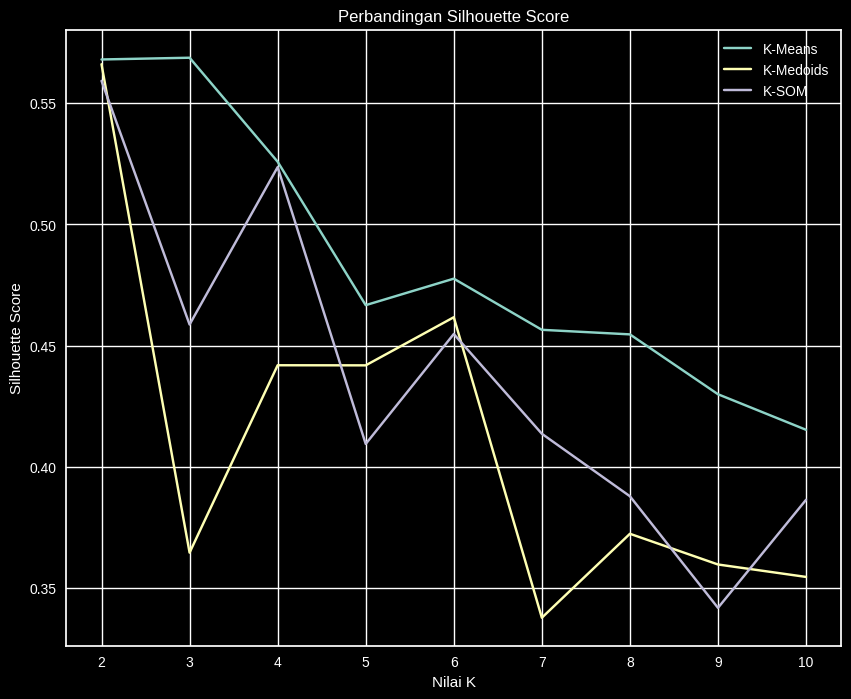

In [147]:
# Plot nilai Silhouette Score
k_values = range(2,11)
plt.plot(k_values, sil_score_kmeans, label='K-Means')
plt.plot(k_values, sil_score_kmedoids, label='K-Medoids')
plt.plot(k_values, sil_score_ksom, label='K-SOM')

# Konfigurasi plot
plt.xlabel('Nilai K')
plt.ylabel('Silhouette Score')
plt.title('Perbandingan Silhouette Score')
plt.legend()

# Tampilkan grafik
plt.show()

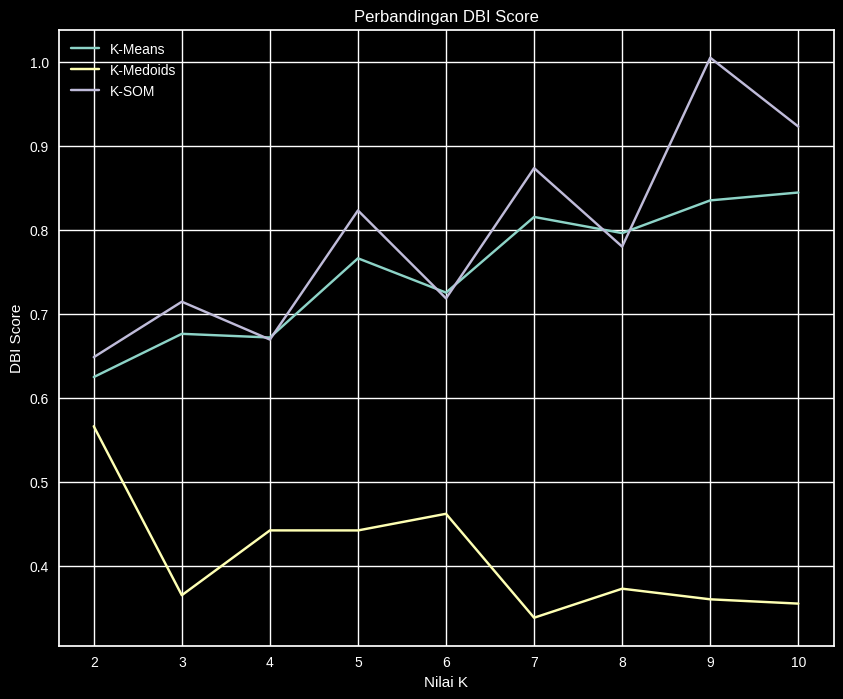

In [148]:
# Plot nilai DBI Score
k_values = range(2,11)
plt.plot(k_values, DBI_score_kmeans, label='K-Means')
plt.plot(k_values, DBI_score_kmedoids, label='K-Medoids')
plt.plot(k_values, DBI_score_ksom, label='K-SOM')

# Konfigurasi plot
plt.xlabel('Nilai K')
plt.ylabel('DBI Score')
plt.title('Perbandingan DBI Score')
plt.legend()

# Tampilkan grafik
plt.show()